# ⌛Time Series Data⌛

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

## Importing the Data😊

In [2]:
raw_csv_data = pd.read_csv('Index2018.csv')
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index('date', inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')
df_comp['market_value']=df_comp.spx

df_comp.head()

,spx,dax,ftse,nikkei,market_value
date,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,469.90
1994-01-10,475.27,2225.00,3440.58,18443.44,475.27
1994-01-11,474.13,2228.10,3413.77,18485.25,474.13
1994-01-12,474.17,2182.06,3372.02,18793.88,474.17
1994-01-13,472.47,2142.37,3360.01,18577.26,472.47


In [3]:
del df_comp['spx'], df_comp['dax'], df_comp['ftse'],df_comp['nikkei']
df_comp.head()

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


In [4]:
perct = 0.8
size = int(len(df_comp)*perct)
df = df_comp.iloc[:size]
df_test = df_comp.iloc[size:]

df.shape, df_test.shape

((5021, 1), (1256, 1))

In [5]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6277 entries, 1994-01-07 to 2018-01-29
Freq: B
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   market_value  6277 non-null   float64
dtypes: float64(1)
memory usage: 98.1 KB


In [6]:
df_comp.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


## White Noise

 Special type of time-series, where the data doesn't follow a pattern. it can't be predicted
 
 **Condictions:**
 - [ ] Constant mean
 - [ ] Constant std
 - [ ] no autocorrelation
 
 
 Autocorrelation - correlation with past version.
 
 No autocorrelation = NO clear relationship between past and present values.

In [16]:
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

In [17]:
# random values from a normal distribution
# loc- location: takes numbers from the average point of the distribution
#scale: how wide
wn = np.random.normal(loc= df.market_value.mean(), scale=df.market_value.std(), size=len(df))

In [18]:
df['wn'] = wn

In [19]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1097.370090
std,292.559287,291.597714
min,438.920000,22.300209
25%,914.620000,890.171063
50%,1144.650000,1098.996090
75%,1316.280729,1293.068102
max,1570.252238,2348.424194


In [10]:
df = df[['market_value','wn']]

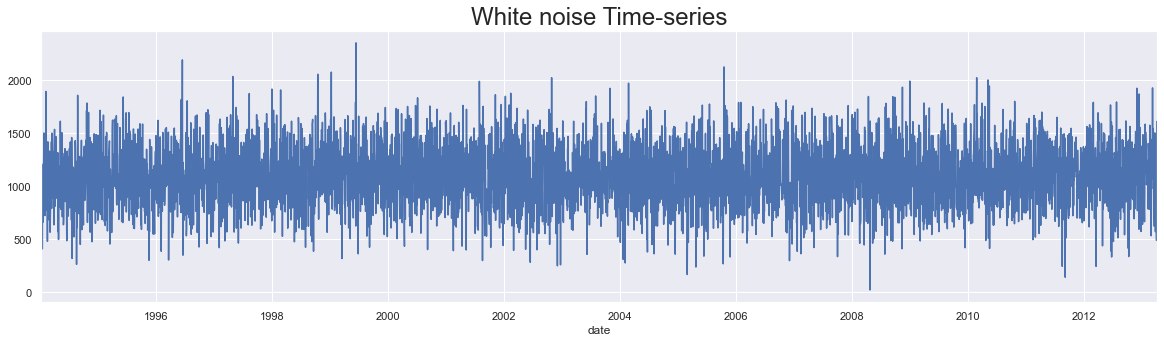

In [20]:
df.wn.plot(figsize=(20,5))
plt.title('White noise Time-series', size=24);

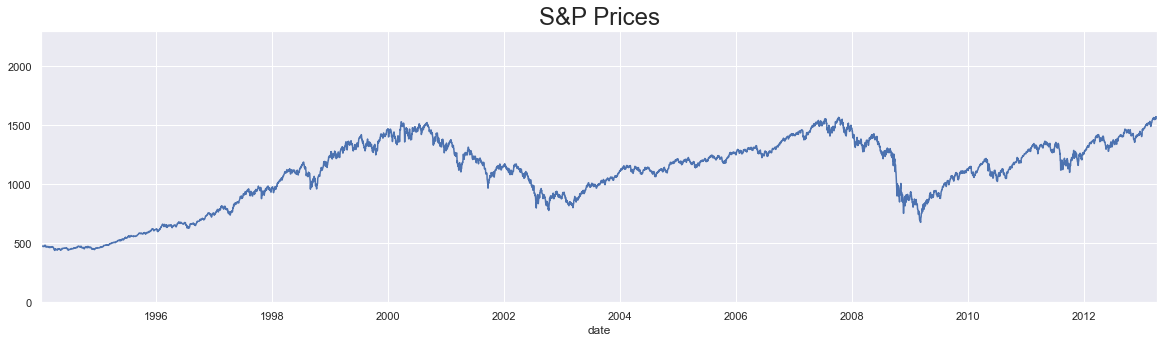

In [21]:
df.market_value.plot(figsize=(20,5))
plt.title('S&P Prices', size=24)
plt.ylim(0,2300); # to compare with the WN;

### RandomWalk

A special type of time-series, where values tend to persist over time and the differences between periods are simply WN.

dataset [here](https://www.kaggle.com/code/christoffer/random-walk-feature-selection/comments)

In [22]:
rw = pd.read_csv('RandWalk.csv')
rw.date = pd.to_datetime(rw.date, dayfirst=True)
rw.set_index('date', inplace=True)
rw = rw.asfreq('b')

In [23]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [24]:
df['rw']= rw.price

In [25]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,650.187720,1122.139662
1994-01-10,475.27,1053.782293,1080.347860
1994-01-11,474.13,864.351602,1082.095245
1994-01-12,474.17,1070.367190,1083.639265
1994-01-13,472.47,1177.220624,1067.146255


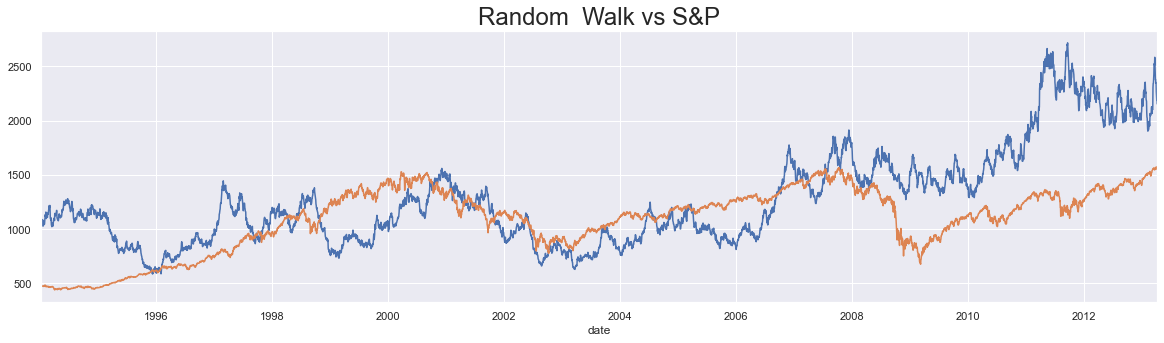

In [26]:
df.rw.plot(figsize=(20,5))
df.market_value.plot(figsize=(20,5))
plt.title('Random  Walk vs S&P', size=24);

In [27]:
df

,market_value,wn,rw
date,,,
1994-01-07,469.900000,650.187720,1122.139662
1994-01-10,475.270000,1053.782293,1080.347860
1994-01-11,474.130000,864.351602,1082.095245
1994-01-12,474.170000,1070.367190,1083.639265
1994-01-13,472.470000,1177.220624,1067.146255
...,...,...,...
2013-04-01,1562.173837,634.032841,2263.675474
2013-04-02,1570.252238,488.584770,2225.000870
2013-04-03,1553.686978,1176.218420,2190.787688


In [28]:
df.describe()

,market_value,wn,rw
count,5021.000000,5021.000000,5021.000000
mean,1091.651926,1097.370090,1269.944293
std,292.559287,291.597714,444.216793
min,438.920000,22.300209,585.483034
25%,914.620000,890.171063,931.550429
50%,1144.650000,1098.996090,1156.363045
75%,1316.280729,1293.068102,1488.362029
max,1570.252238,2348.424194,2715.508720


In [26]:
#df.to_csv('market_wn_rw.csv',index=True,date_format='%Y-%d-%m')

## OBS: Market efficiency

Measures the level of difficulty in forecasting correct future values.
if a TS resembles a RW, it can't predict 
but if TS can be predicted, then there arbitrage opportunitys.

arbitrage = when a manager can buy and sell commodities and make a safe profit, while the Price(or the timeseries here)adjusts

---